# 정규분포
정규분포(Normal Distribution)는 통계학과 확률론에서 가장 중요한 연속 확률분포 중 하나로, 많은 자연현상과 사회현상의 데이터들이 이 분포를 따르는 경우가 많습니다.

* 대칭성: 정규분포는 평균 μ를 중심으로 좌우 대칭입니다. 즉, 평균, 중앙값(median), 최빈값(mode)이 모두 동일합니다.
* 종 모양의 곡선 (Bell Curve): 곡선의 중앙이 가장 높고 양쪽으로 갈수록 점점 낮아지는 종 모양을 띕니다. 이로 인해 극단적인 값(양쪽 꼬리 부분)의 확률은 매우 작습니다.
* 중심극한정리 (Central Limit Theorem): 많은 독립적인 확률 변수들의 합(또는 평균)은 분포의 형태에 상관없이 정규분포에 가까워진다는 중요한 이론입니다. 이는 왜 다양한 실제 데이터들이 정규분포를 따르는지에 대한 근본적인 이유를 제공합니다.

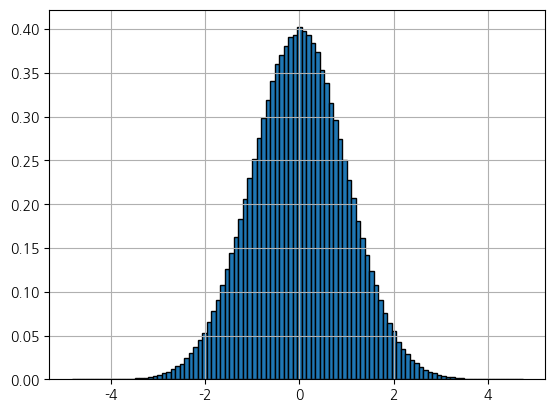

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import koreanize_matplotlib

# 정규분포를 따르는 랜덤값 10개 (평균 0, 표준편차 1)
data = np.random.randn(100000)           # 랜덤값 많이 생성할수록 그래프의 형태도 정규분포그래프꼴로 나옴
data

plt.hist(data, bins = 100, edgecolor = "black",
         density = True)           # 정규화.  총 면적이 1이 되게 한다는 뜻 
plt.grid()
plt.show()

# 단일 표본 t-검정
단일 표본 검정(One-Sample Test)은 하나의 표본 데이터로부터 계산된 통계량(예: 표본 평균)이 특정한 이론적 모수(예: 모평균)와 차이가 있는지를 검정하는 통계적 방법입니다. 가장 많이 사용되는 방법은 ```단일 표본 t-검정(One-sample t-test)``` 인데, 이는 표본의 분산을 이용하여 표본 평균과 가정한 모평균의 차이가 우연에 의한 것인지 아니면 통계적으로 유의미한지를 판단합니다.

* 정규성 가정: 표본의 크기가 작을 경우, 모집단이 정규분포를 따른다는 가정이 필요합니다. 큰 표본(n≥30)인 경우 중심극한정리에 의해 정규분포에 근사합니다.
* 독립성: 표본 데이터는 서로 독립적이어야 합니다.

In [7]:
import pandas as pd

# 팝콘 라지 사이즈의 무게가 일반적으로 120g 이다.      <<  이 말이 사실인지를 검정하고자 함

# 귀무가설 : 팝콘 무게가 평균 120g이다
# 대립가설 : 팝콘 무게가 평균 120g이 아니다
df = pd.DataFrame({
    'weights':[122, 121, 120, 119, 125, 115, 121, 118, 117, 127,
           123, 129, 119, 124, 114, 126, 122, 124, 121, 116,
           120, 123, 127, 118, 122, 117, 124, 125, 123, 121],
})

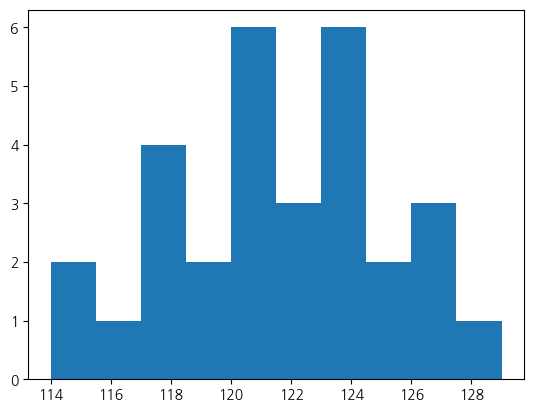

In [9]:
plt.hist(df["weights"])
plt.show()

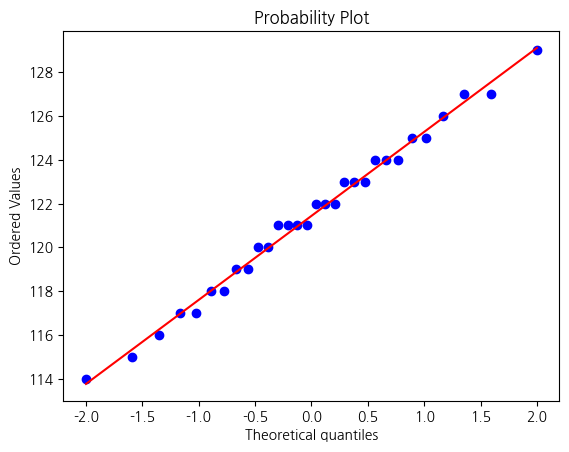

In [10]:
# Q-Q plot        # 그래프의 점이 빨간선 위에 있으면 정규성을 띤다고 할 수 있다
stats.probplot(df["weights"], dist = "norm", plot = plt)
plt.show()

In [12]:
# 이 데이터가 정규성을 띠는지 샤피로 윌크 검정

# 귀무가설 : 이 분포가 정규성을 보인다
# 대립가설 : 이 분포가 정규성을 보이지 않는다 

values, p = stats.shapiro(df['weights'])         # 정규성을 보인다!
values, p

(0.9877707598413207, 0.9746408136556016)

In [13]:
values, p = stats.ttest_1samp(df['weights'], 120)         # 귀무가설 : 팝콘의 평균이 120g이다 
values, p

# p < 0.05  =>  이 팝콘의 평균 무게는 120g이 아니다.
# 표본 평균 120보다 2.1 표준오차가 존재한다.

(2.1155384372682344, 0.043092957066609296)

In [16]:
values, p = stats.ttest_1samp(df['weights'], 120,
                              alternative = "greater")         # 귀무가설 : 팝콘의 평균이 120g보다 크다
values, p
# p < 0.05  =>  팝콘의 평균이 120g보다 크지 않다

(2.1155384372682344, 0.021546478533304648)

In [15]:
values, p = stats.ttest_1samp(df['weights'], 120,
                              alternative = "less")         # 귀무가설 : 팝콘의 평균이 120g보다 작다
values, p
# p > 0.05 => 귀무가설 기각x. 팝콘의 평균이 120g보다 작지 않다고 할 수 없다 (=작다) 

(2.1155384372682344, 0.9784535214666953)

* 만약 정규성을 따르지 않는다면?

In [19]:
# 귀무가설 : 팝콘의 무게가 중앙값이 120g이다.      값이 치우쳐져있어서 정규성을 따르지 않으면 중앙값이 더 정확도가 높다
# 대립가설 : 팝콘의 무게가 중앙값이 120g이 아니다.
# 윌콕슨 부호 순위 검정

diff = df["weights"] - 120
stats.wilcoxon(diff)

WilcoxonResult(statistic=118.0, pvalue=0.052221327392073344)

## 연습문제
영화관에서 판매하는 팝콘 라지 사이즈의 무게는 다음과 같다. 팝콘 라지 사이즈의 평균 무게가 120g 보다 작다고 할 수 있는가? (유의수준 0.05)

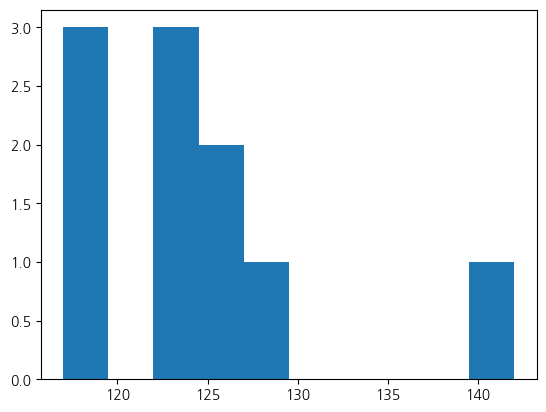

In [20]:
df = pd.DataFrame({
    'weights':[125, 126, 118, 124, 117, 127, 123, 122, 119, 142]
})

plt.hist(df["weights"])
plt.show()

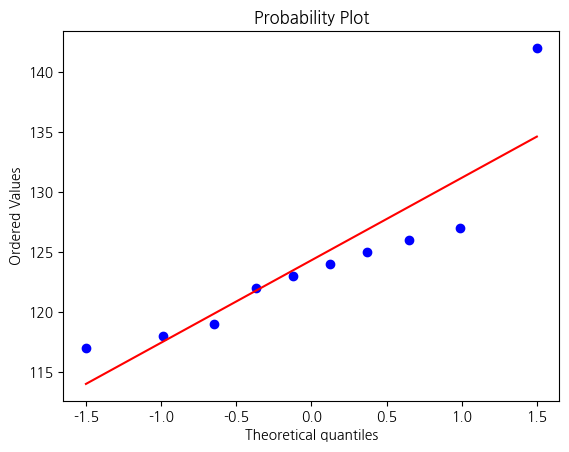

In [25]:
# Q-Q plot
stats.probplot(df["weights"], dist = "norm", plot = plt)
plt.show()

In [1]:
# 이 데이터가 정규성을 띠는지 샤피로 윌크 검정

# 귀무가설 : 이 분포가 정규성을 보인다
# 대립가설 : 이 분포가 정규성을 보이지 않는다 

values, p = stats.shapiro(df['weights']) 
values, p

# p < 0.05 => 귀무가설 기각.  정규성을 보이지 않는다   ->   평균값이 대표값이 될 수 없다는 것이므로, 가정 자체를 중앙값에 대해서로 바꿔야한다. 

NameError: name 'stats' is not defined

In [27]:
# 귀무가설 : 팝콘의 무게의 중앙값이 120g이다.
# 대립가설 : 팝콘의 무게의 중앙값이 120g보다 작다

df["diff"] = df["weights"] - 120
stats.wilcoxon(df["diff"], alternative = "less")         # 귀무가설 : 팝콘의 중앙값이 120g보다 작다

# p > 0.05  =>  귀무가설 기각X. 팝콘의 평균이 120g보다 작다

WilcoxonResult(statistic=47.0, pvalue=0.9814453125)